In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 64
p = 7
max_MOOD_iters = 40

sim1 = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.square(idx, x, y, z, vx=1, vy=1, xp=xp),
    nx=N,
    ny=N,
    p=p,
    MOOD=True,
    cascade="first-order",
    max_MOOD_iters=max_MOOD_iters,
    NAD=True,
    PAD={"rho": (0.0, 1.0)},
    PAD_atol=1e-14,
)

sim2 = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.square(idx, x, y, z, vx=1, vy=1, xp=xp),
    nx=N,
    ny=N,
    p=p,
    MOOD=True,
    cascade="muscl1",
    max_MOOD_iters=max_MOOD_iters,
    NAD=True,
    PAD={"rho": (0.0, 1.0)},
    PAD_atol=1e-14,
)

sim3 = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.square(idx, x, y, z, vx=1, vy=1, xp=xp),
    nx=N,
    ny=N,
    p=p,
    MOOD=True,
    cascade="full",
    max_MOOD_iters=max_MOOD_iters,
    NAD=True,
    PAD={"rho": (0.0, 1.0)},
    PAD_atol=1e-14,
)

In [3]:
sim1.run(n=20, q_max=2, log_freq=10)
sim2.run(n=20, q_max=2, log_freq=10)
sim3.run(n=20, q_max=2, log_freq=10)

Step #20 @ t=1.25e-01 | dt=6.25e-03 | (done)                                                        
Step #20 @ t=1.25e-01 | dt=6.25e-03 | (done)                                                        
Step #20 @ t=1.25e-01 | dt=6.25e-03 | (done)                                                        


In [4]:
print(
    f"sim1, min rho: {np.min(sim1.minisnapshots['min_rho'])}, "
    f"max rho: {np.max(sim1.minisnapshots['max_rho'])}"
)
print(
    f"sim2, min rho: {np.min(sim2.minisnapshots['min_rho'])}, "
    f"max rho: {np.max(sim2.minisnapshots['max_rho'])}"
)
print(
    f"sim3, min rho: {np.min(sim3.minisnapshots['min_rho'])}, "
    f"max rho: {np.max(sim3.minisnapshots['max_rho'])}"
)

sim1, min rho: -6.333325882665457e-15, max rho: 1.0000000000000004
sim2, min rho: -7.87236720218503e-15, max rho: 1.0000000000000004
sim3, min rho: -9.091716111553312e-15, max rho: 1.0000000000000053


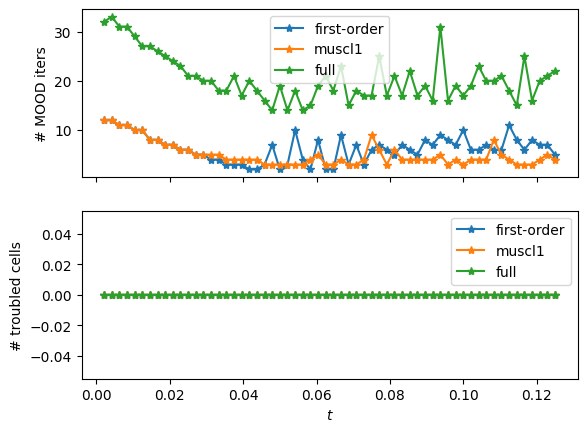

In [5]:
fig, axs = plt.subplots(2, 1, sharex=True)

axs[1].set_xlabel(r"$t$")
axs[0].set_ylabel("# MOOD iters")
axs[1].set_ylabel("# troubled cells")

vis.plot_timeseries(sim1, axs[0], "nfine_MOOD_iters", label="first-order", marker="*")
vis.plot_timeseries(sim2, axs[0], "nfine_MOOD_iters", label="muscl1", marker="*")
vis.plot_timeseries(sim3, axs[0], "nfine_MOOD_iters", label="full", marker="*")

vis.plot_timeseries(
    sim1, axs[1], "nfine_troubled_cells", label="first-order", marker="*"
)
vis.plot_timeseries(sim2, axs[1], "nfine_troubled_cells", label="muscl1", marker="*")
vis.plot_timeseries(sim3, axs[1], "nfine_troubled_cells", label="full", marker="*")

axs[0].legend()
axs[1].legend()

/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(


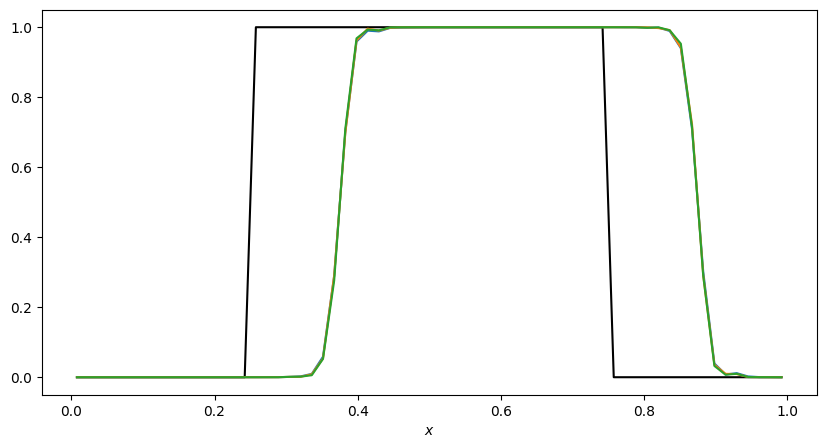

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_1d_slice(sim1, ax, "rho", cell_averaged=True, y=0.5, t=0, color="k")
vis.plot_1d_slice(
    sim1, ax, "rho", cell_averaged=True, y=0.5, xlabel=False, label="first-order"
)
vis.plot_1d_slice(
    sim2, ax, "rho", cell_averaged=True, y=0.5, xlabel=False, label="muscl1"
)
vis.plot_1d_slice(sim3, ax, "rho", cell_averaged=True, y=0.5, xlabel=True, label="full")